INTRODUCTION

In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid. The dataset was obtained from Kaggle.com

Content:
Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. Personal/identifying data has been removed. This dataset is a single .csv with the following fields.

1. Features of Animal Bite Data
2. Animal Species
3. Animal Name VS Number of Bite
4. The Most Aggressive 10 Species
5. When Animals Bite
6. Male or Female is More Dangerous
7. Probability of Being Rabid
8. Common Feature of 4 Rabid Animal

The  dataset Health_Animalbites.csv is a single .csv with the following fields:

bite_date: The date the bite occurred
SpeciesIDDesc: The species of animal that did the biting
BreedIDDesc: Breed (if known)
GenderIDDesc: Gender (of the animal)
color: color of the animal
vaccination_yrs: how many years had passed since the last vaccination
vaccination_date: the date of the last vaccination
victim_zip: the zipcode of the victim
AdvIssuedYNDesc: whether advice was issued
WhereBittenIDDesc: Where on the body the victim was bitten
quarantine_date: whether the animal was quarantined
DispositionIDDesc: whether the animal was released from quarantine
headsentdate: the date the animal’s head was sent to the lab
release_date: the date the animal was released
ResultsIDDesc: results from lab tests (for rabies)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import streamlit as st

In [2]:
df = pd.read_csv('Health_AnimalBites.csv')
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


pip install streamlit

In [3]:
df.shape

(9003, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [5]:

df.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

There are 15 features

In [6]:
#Animal species
# There are 9 animals name 
species = df.SpeciesIDDesc
species = species.dropna() #drop nan values in species feature
speciesOfAnimal = species.unique()
print(speciesOfAnimal)

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' 'HORSE' 'SKUNK' 'FERRET']


Text(0, 0.5, 'Bite count')

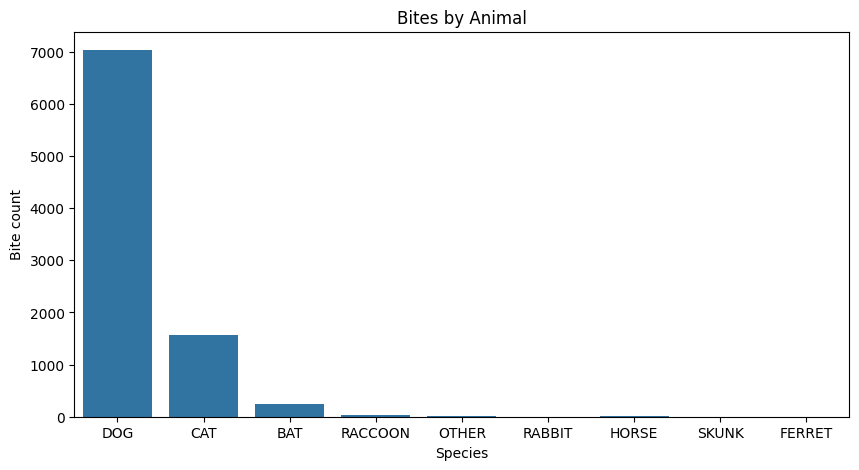

In [7]:
#What Animal bite the most?
plt.figure(figsize=(10,5))
#sns.countplot(df['SpeciesIDDesc'])
sns.countplot(x="SpeciesIDDesc",data=df)
plt.title('Bites by Animal')
plt.xlabel('Species')
plt.ylabel('Bite count')     

#From the graph we can see DOG bites the most, followed by cat and bat
           

Number of  DOG bite:  7029
Number of  CAT bite:  1568
Number of  BAT bite:  237
Number of  RACCOON bite:  27
Number of  OTHER bite:  11
Number of  RABBIT bite:  3
Number of  HORSE bite:  5
Number of  SKUNK bite:  1
Number of  FERRET bite:  4
[7029, 1568, 237, 27, 11, 3, 5, 1, 4]


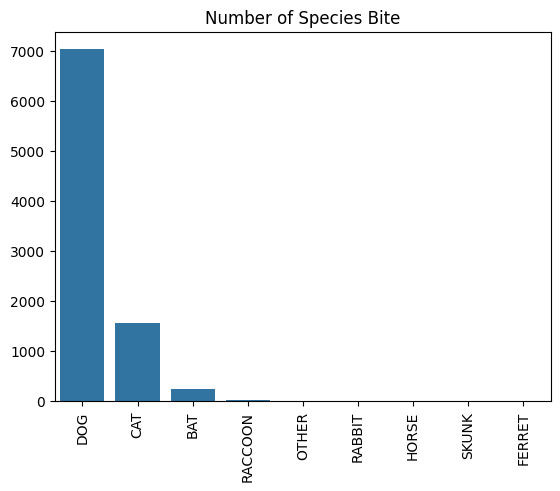

In [8]:

animal_list = []
for  i in speciesOfAnimal:
    animal_list.append(len(species[species==i]))
    print("Number of ",i, "bite: ",len(species[species==i])) 
ax = sns.barplot(x=speciesOfAnimal, y =animal_list)
plt.title('Number of Species Bite')
plt.xticks(rotation=90)
print(animal_list)
   

When Animals Bite

Monthly distribution of dog, cat and bat bites are visualized.

In [9]:
def species_month(species,data):
    list_of_month=['01','02','03','04','05','06','07','08','09','10','11','12']
    num_of_species=[]
    for i in list_of_month:
        x = data.loc[(data.SpeciesIDDesc==species)&(data.bite_date.str.split('-').str[1]==i)]
        num_of_species.append(len(x))
    ax=sns.barplot(x=list_of_month,y=num_of_species)
    plt.title(species + ' bites during 12 months period')

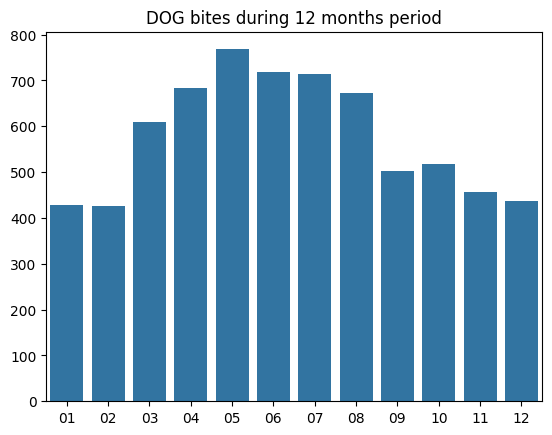

In [10]:
#Dogs bite happen the most in May
species_month('DOG',df)

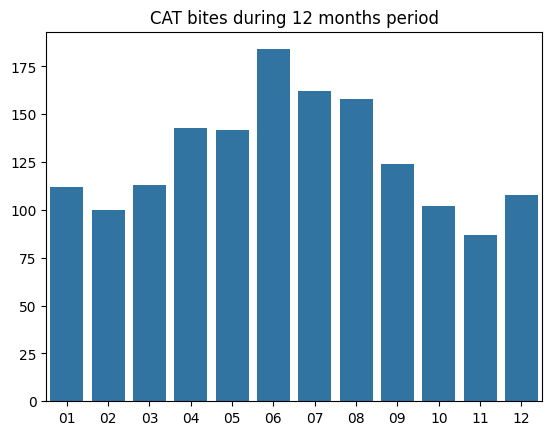

In [11]:
#Cats bite the most in June
species_month('CAT',df)

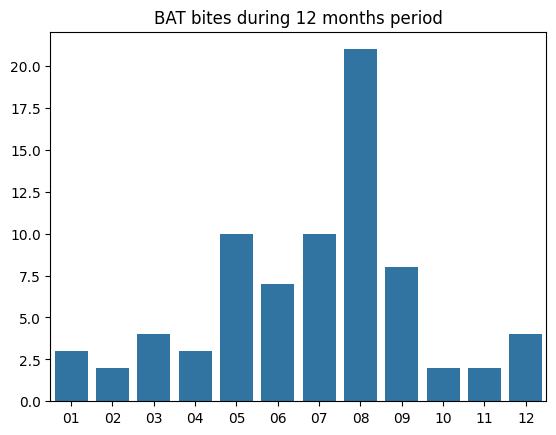

In [12]:
#Bats bite the most in August
species_month('BAT',df)

df['bite_year']= df['bite_date'].str.split('-').str[0]

Text(0, 0.5, 'Bites Count')

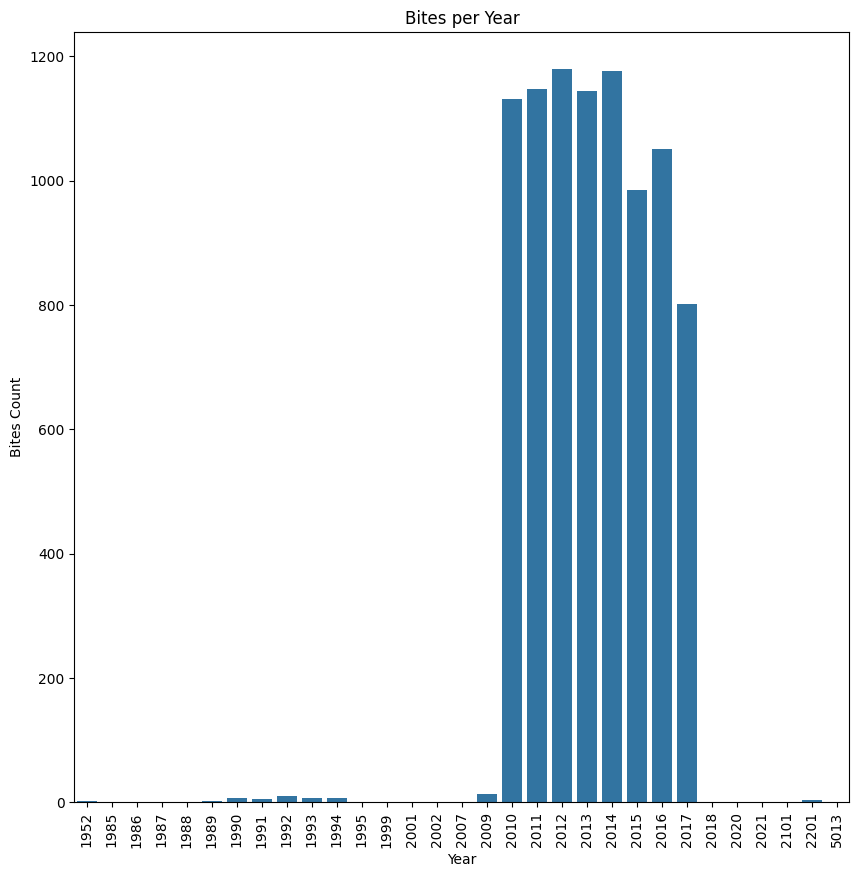

In [13]:
#df['bite_year']= df['bite_date'].str.split('-').str[0]
#df[bite_month=df.bite_date.
#Bites Over Time
plt.figure(figsize=(10,10))
sns.countplot(x=df['bite_date'].str.split('-').str[0].sort_values())
#sns.countplot(x=df['bite_year'].sort_values())
plt.xticks(rotation=90)
plt.title('Bites per Year')
plt.xlabel('Year')
plt.ylabel('Bites Count')


#Our data is between 1985 and 2017. The bar graph above shows that the highest bites occur in year 2012 and 2014
From 1985 to 2009 there were not many bites compare to year 2010 and above. This could b there were not many people who have or encountered animals prior to year 2010

The bargraph shows that the highest bites occur in warm season summer months(May to August)

df['bite_month']= df['bite_date'].str.split('-').str[1]

Text(0, 0.5, 'Bite count')

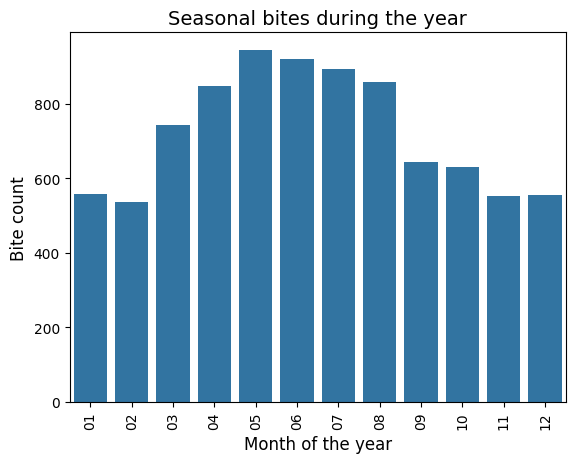

In [16]:
#df[bite_month]= df.bite_date.str.split('-').str[1]
fig,ax = plt.subplots()
#sns.countplot(df.bite_date.str.split('-').str[1])
sns.countplot(x=df.bite_date.str.split('-').str[1].sort_values())
#sns.countplot(x='bite_month',data=df)
plt.xticks(rotation=90)
plt.title('Seasonal bites during the year',fontsize=14)
plt.xlabel('Month of the year',fontsize=12)
plt.ylabel('Bite count',fontsize=12)

In [ ]:
The bargraph shows that the highest bites occur in warm season summer months(May to August)

The Most Aggressive 10 Species

PIT BULL
GERM SHEPHERD
LABRADOR RETRIV
BOXER
CHICHAUHUA
SHIH TZU
BEAGLE (that shocked me bc its my favourite :) )
ROTTWEILER
AAUST. TERR
DACHSHUND

In [19]:
count = df.BreedIDDesc.value_counts()
print(count)

BreedIDDesc
PIT BULL           1102
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
                   ... 
RED HEELER            1
BRIARD                1
CHOCOLATE LAB.        1
OLD ENG SHP DOG       1
IRISH WOLFHOUND       1
Name: count, Length: 101, dtype: int64


Index(['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER', 'CHICHAUHUA',
       'SHIH TZU', 'BEAGLE', 'ROTTWEILER', 'AAUST. TERR.', 'DACHSHUND'],
      dtype='object', name='BreedIDDesc')


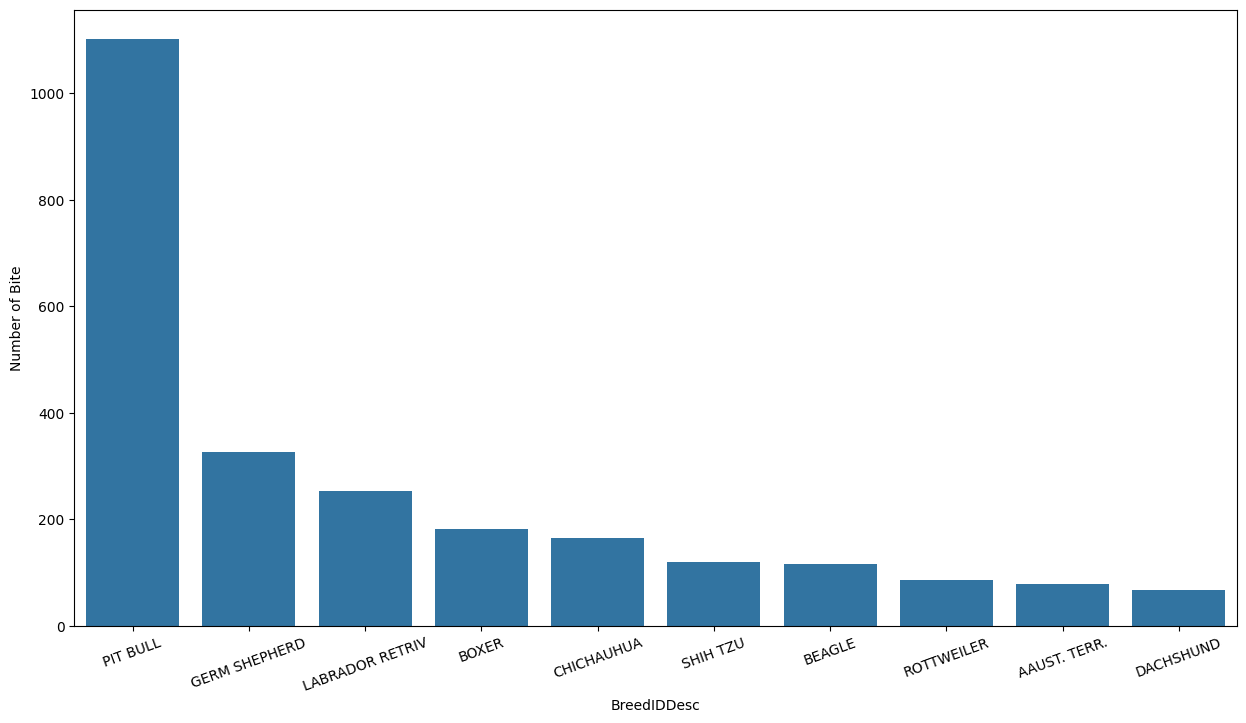

In [20]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10])
plt.xticks(rotation=20)
plt.ylabel("Number of Bite")
plt.savefig('graph.png')

print(count[0:10].index)

Where the Animals Bite

Where dogs, cats and bats bite people are visualized. While changing bite_place method, you can observe where other animals bite.

In [21]:
df.WhereBittenIDDesc.unique()

array(['BODY', 'HEAD', nan, 'UNKNOWN'], dtype=object)

In [27]:
import matplotlib.patches as patches

In [30]:
def bite_where(animal,data):
    bitePlaces = data.WhereBittenIDDesc.unique()
    #print(bitePlaces)
    head = data.loc[(data['SpeciesIDDesc']==animal)&(data['WhereBittenIDDesc']=='HEAD')]
    body = data.loc[(data['SpeciesIDDesc']==animal)&(data['WhereBittenIDDesc']=='BODY')]
    num_of_head = len(head)
    num_of_body = len(body)
    total = num_of_head+num_of_body
    
    fig1=plt.figure()
    ax1=fig1.add_subplot(111,aspect='equal')
    ax1.add_patch(
        patches.Rectangle((0.3,0.1),0.4,0.5,alpha=num_of_body/float(total),color='r')
    )
    circle = plt.Circle((0.5,0.7),0.1,color='r',alpha=num_of_head/float(total))
    ax1.add_artist(circle)
    plt.text(0.45,0.7,round(num_of_head/float(total),2))
    plt.text(0.45,0.4,round(num_of_body/float(total),2))
    plt.title(str(animal)+' Bite Probability of Head and Body')
    plt.axis('off')

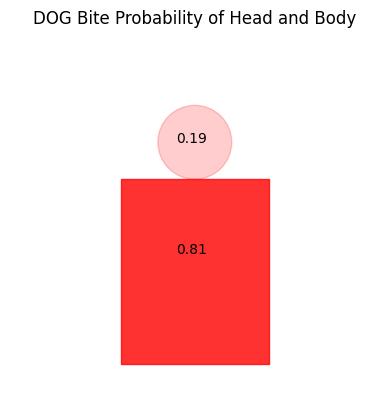

In [31]:
#Dog bites 19% head and 81% body
bite_where('DOG',df)

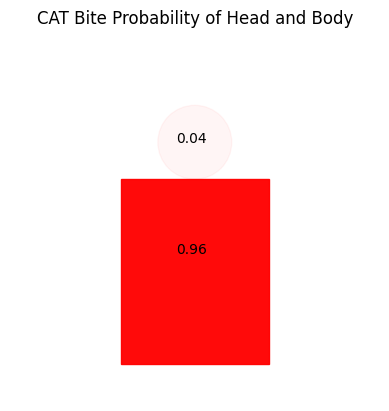

In [33]:
#Cat bites 4% head and 96% body
bite_where('CAT',df)

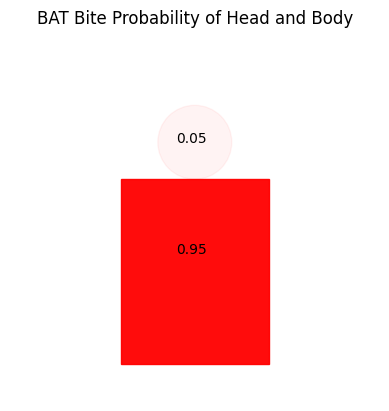

In [34]:
#Bat bites 5% head and 95% body
bite_where('BAT',df)

Male or Female is More Dangerous

In [35]:
df.GenderIDDesc.value_counts()


GenderIDDesc
MALE       3832
FEMALE     2016
UNKNOWN     629
Name: count, dtype: int64

GenderIDDesc
MALE       3832
FEMALE     2016
UNKNOWN     629
Name: count, dtype: int64


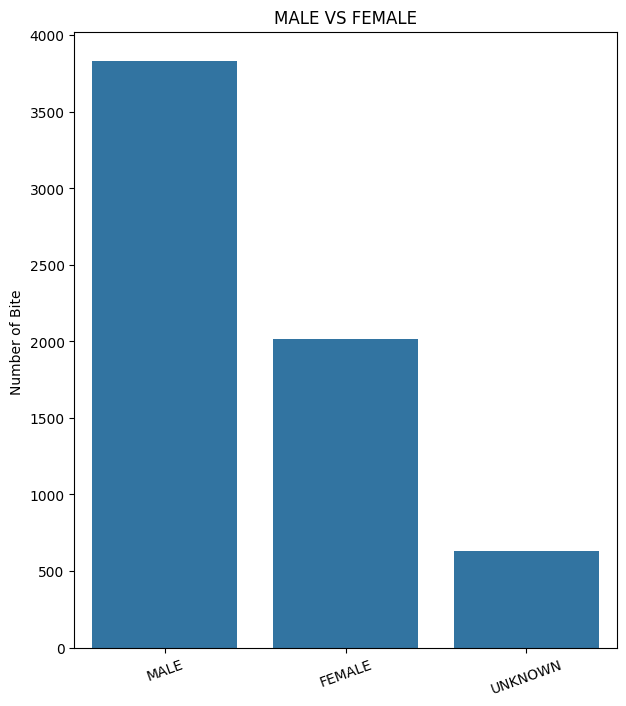

In [38]:
gender = ['MALE','FEMALE','UNKNOWN']
count_gender = df.GenderIDDesc.value_counts()
plt.figure(figsize= (7,8))
x = sns.barplot(x=gender, y= count_gender[0:3])
plt.ylabel('Number of Bites ')
plt.xticks(rotation = 20)
plt.title('MALE VS FEMALE VS UNKNOWN')
print(count_gender[0:3])

Probability of Being Rabid

In [39]:
df['ResultsIDDesc'].value_counts()

ResultsIDDesc
UNKNOWN     1240
NEGATIVE     299
POSITIVE       4
Name: count, dtype: int64

In [41]:
def rabid_prob(animal,data):
    labels = ['POSITIVE','NEGATIVE']
    colors = ['red','green']
    explode = [0.1,0]
    p = data.loc[(data['SpeciesIDDesc']==animal)&(data['ResultsIDDesc']=='POSITIVE')]
    n = data.loc[(data['SpeciesIDDesc']==animal)&(data['ResultsIDDesc']=='NEGATIVE')]
    sizes = [len(p),len(n)]
    print(sizes)
    if len(p)==0:
        labels = ['','NEGATIVE']
    plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct ='%1.1f&&')
    plt.axis('equal')
    plt.title(animal + ' Rabid Probability')
    plt.show()

[1, 58]


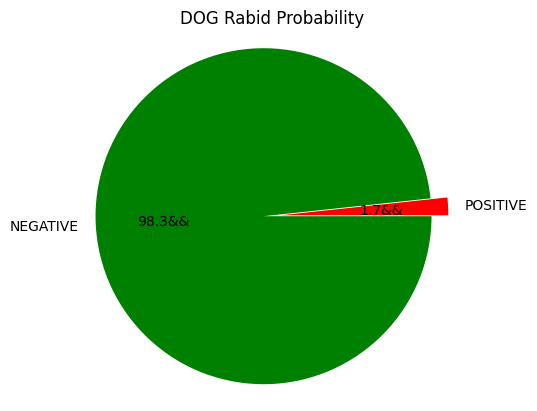

In [42]:
# Dog rabid probability is 1.7%
rabid_prob('DOG',df)

[0, 64]


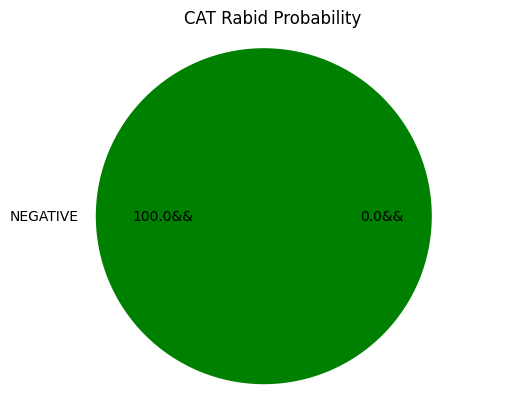

In [43]:
# Cat rabid probability is 0%
rabid_prob('CAT',df)

[3, 160]


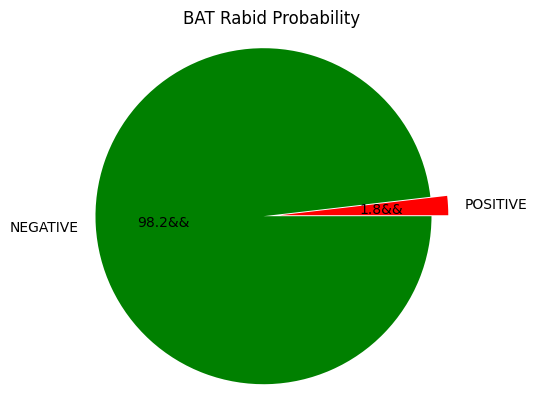

In [44]:
# Bat rabid probability is 1.8%
rabid_prob('BAT',df)

Rabid probability is very low, only 4 cases are rabid

Common Feature of 4 Rabid Animal

There are 4 rabid animal that are 3 bat and 1 dog.
Information of bats are nan
Information of dog is greatpyreneese, female and white.

In [46]:
rabid_data = df.loc[(df['ResultsIDDesc']=='POSITIVE')]
rabid_data = rabid_data.loc[:,['bite_date','SpeciesIDDesc','BreedIDDesc','GenderIDDesc','color','ResultsIDDesc']]
print(rabid_data)

                bite_date SpeciesIDDesc      BreedIDDesc GenderIDDesc  color  \
1418  2015-05-05 00:00:00           BAT              NaN          NaN    NaN   
1502  2017-04-29 00:00:00           DOG  GREAT PYRENEESE       FEMALE  WHITE   
1677                  NaN           BAT              NaN          NaN    NaN   
1678                  NaN           BAT              NaN          NaN    NaN   

     ResultsIDDesc  
1418      POSITIVE  
1502      POSITIVE  
1677      POSITIVE  
1678      POSITIVE  


Conclusions
The species with the most bite incidents reported were dogs, especifically male dogs.

Dogs bit about 7000 times from 1985 - 2017. That is ddisproportionately higher than cat by about 5500 more bites.

The breed of dog that was associated with the most bites were Pitbulls.

The body was the most common part bitten by Dogs.

The morbid probabiliyt is very low, only 4 incidents : 3 from unknown bats and one greatpyreneese,white female dog